In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
import pylab
sns.set()
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math

In [3]:
file_path = Path('data/AAPL.csv')

In [5]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [9]:
df.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

In [11]:
df.columns.to_list()

['Unnamed: 0',
 'symbol',
 'date',
 'close',
 'high',
 'low',
 'open',
 'volume',
 'adjClose',
 'adjHigh',
 'adjLow',
 'adjOpen',
 'adjVolume',
 'divCash',
 'splitFactor']

In [13]:
df.value_counts()

Unnamed: 0  symbol  date                       close    high    low       open    volume    adjClose    adjHigh     adjLow      adjOpen     adjVolume  divCash  splitFactor
0           AAPL    2015-05-27 00:00:00+00:00  132.045  132.26  130.0500  130.34  45833246  121.682558  121.880685  119.844118  120.111360  45833246   0.0      1.0            1
835         AAPL    2018-09-18 00:00:00+00:00  218.240  221.85  217.1200  217.79  31571712  213.171491  216.697651  212.077503  212.731943  31571712   0.0      1.0            1
842         AAPL    2018-09-27 00:00:00+00:00  224.950  226.44  223.5400  223.82  30181227  219.725655  221.181051  218.348402  218.621899  30181227   0.0      1.0            1
841         AAPL    2018-09-26 00:00:00+00:00  220.420  223.75  219.7600  221.00  23984706  215.300862  218.553525  214.656190  215.867392  23984706   0.0      1.0            1
840         AAPL    2018-09-25 00:00:00+00:00  222.190  222.82  219.7000  219.75  24554379  217.029755  217.645123  214.

In [15]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


In [19]:
df.isna()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1254,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1255,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1256,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isna().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [23]:
df.fillna('ffill', inplace=True)

In [25]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1258 entries, 0 to 1257
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
1258 non-null   object
dtypes: object(1)
memory usage: 10.0+ KB


In [27]:
df.date.describe()

count                          1258
unique                         1258
top       2015-05-27 00:00:00+00:00
freq                              1
Name: date, dtype: object

In [29]:
df.date.value_counts()

date
2015-05-27 00:00:00+00:00    1
2018-09-18 00:00:00+00:00    1
2018-09-27 00:00:00+00:00    1
2018-09-26 00:00:00+00:00    1
2018-09-25 00:00:00+00:00    1
                            ..
2017-01-24 00:00:00+00:00    1
2017-01-23 00:00:00+00:00    1
2017-01-20 00:00:00+00:00    1
2017-01-19 00:00:00+00:00    1
2020-05-22 00:00:00+00:00    1
Name: count, Length: 1258, dtype: int64

In [31]:
df_copy = df.copy()

In [33]:
df = df[['date', 'close']]

In [35]:
df.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


<Axes: title={'center': 'Close Apple Price'}>

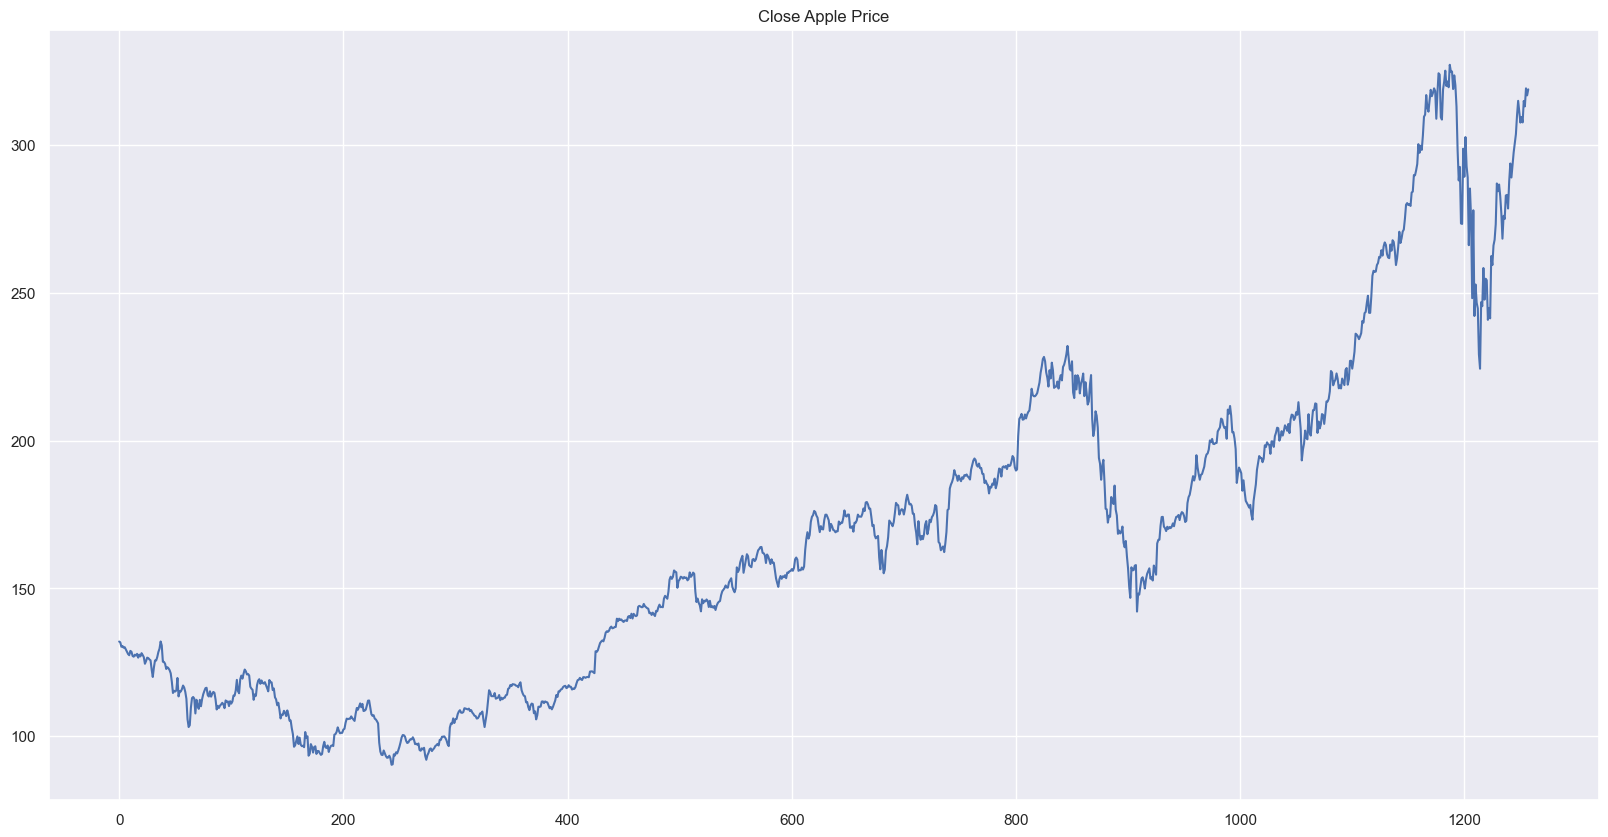

In [37]:
df.close.plot(figsize=(20,10), title = 'Close Apple Price')

In [39]:
df.close.max()

327.2

In [41]:
df.close.min()

90.34

In [43]:
df.date.max()

'2020-05-22 00:00:00+00:00'

In [45]:
df.date.min()

'2015-05-27 00:00:00+00:00'

In [47]:
df.loc[df.close.idxmax()]

date     2020-02-12 00:00:00+00:00
close                        327.2
Name: 1187, dtype: object

In [49]:
df.loc[df.close.idxmin()]

date     2016-05-12 00:00:00+00:00
close                        90.34
Name: 243, dtype: object

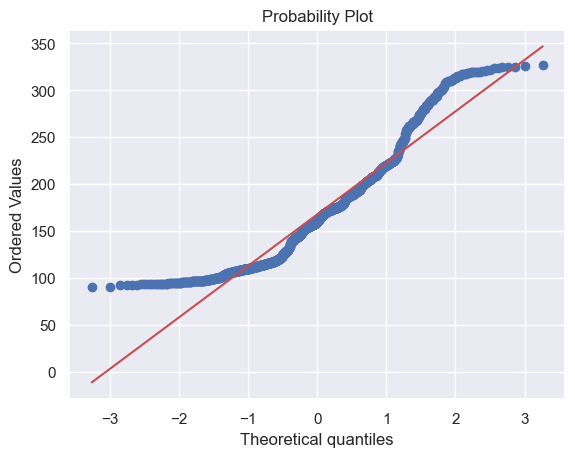

In [51]:
scipy.stats.probplot(df.close, plot = pylab)
plt.show()

In [53]:
df['date'] = pd.to_datetime(df.date)

In [55]:
df.dtypes

date     datetime64[ns, UTC]
close                float64
dtype: object

In [57]:
df.date.describe()

count                                   1258
mean     2017-11-22 14:13:55.612082688+00:00
min                2015-05-27 00:00:00+00:00
25%                2016-08-23 06:00:00+00:00
50%                2017-11-20 12:00:00+00:00
75%                2019-02-24 06:00:00+00:00
max                2020-05-22 00:00:00+00:00
Name: date, dtype: object

In [59]:
df.index

RangeIndex(start=0, stop=1258, step=1)

In [61]:
df.set_index('date', inplace = True)

In [63]:
df.index

DatetimeIndex(['2015-05-27 00:00:00+00:00', '2015-05-28 00:00:00+00:00',
               '2015-05-29 00:00:00+00:00', '2015-06-01 00:00:00+00:00',
               '2015-06-02 00:00:00+00:00', '2015-06-03 00:00:00+00:00',
               '2015-06-04 00:00:00+00:00', '2015-06-05 00:00:00+00:00',
               '2015-06-08 00:00:00+00:00', '2015-06-09 00:00:00+00:00',
               ...
               '2020-05-11 00:00:00+00:00', '2020-05-12 00:00:00+00:00',
               '2020-05-13 00:00:00+00:00', '2020-05-14 00:00:00+00:00',
               '2020-05-15 00:00:00+00:00', '2020-05-18 00:00:00+00:00',
               '2020-05-19 00:00:00+00:00', '2020-05-20 00:00:00+00:00',
               '2020-05-21 00:00:00+00:00', '2020-05-22 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=1258, freq=None)

In [65]:
df.head()

,close
date,
2015-05-27 00:00:00+00:00,132.045
2015-05-28 00:00:00+00:00,131.780
2015-05-29 00:00:00+00:00,130.280
2015-06-01 00:00:00+00:00,130.535
2015-06-02 00:00:00+00:00,129.960


In [67]:
size = int(len(df)*0.8)

In [69]:
df_train = df.iloc[:size]

In [71]:
df_test = df.iloc[size:]

In [73]:
df = df_train

In [75]:
df.tail()

,close
date,
2019-05-17 00:00:00+00:00,189.00
2019-05-20 00:00:00+00:00,183.09
2019-05-21 00:00:00+00:00,186.60
2019-05-22 00:00:00+00:00,182.78
2019-05-23 00:00:00+00:00,179.66


In [77]:
df_test.head()

,close
date,
2019-05-24 00:00:00+00:00,178.97
2019-05-28 00:00:00+00:00,178.23
2019-05-29 00:00:00+00:00,177.38
2019-05-30 00:00:00+00:00,178.30
2019-05-31 00:00:00+00:00,175.07


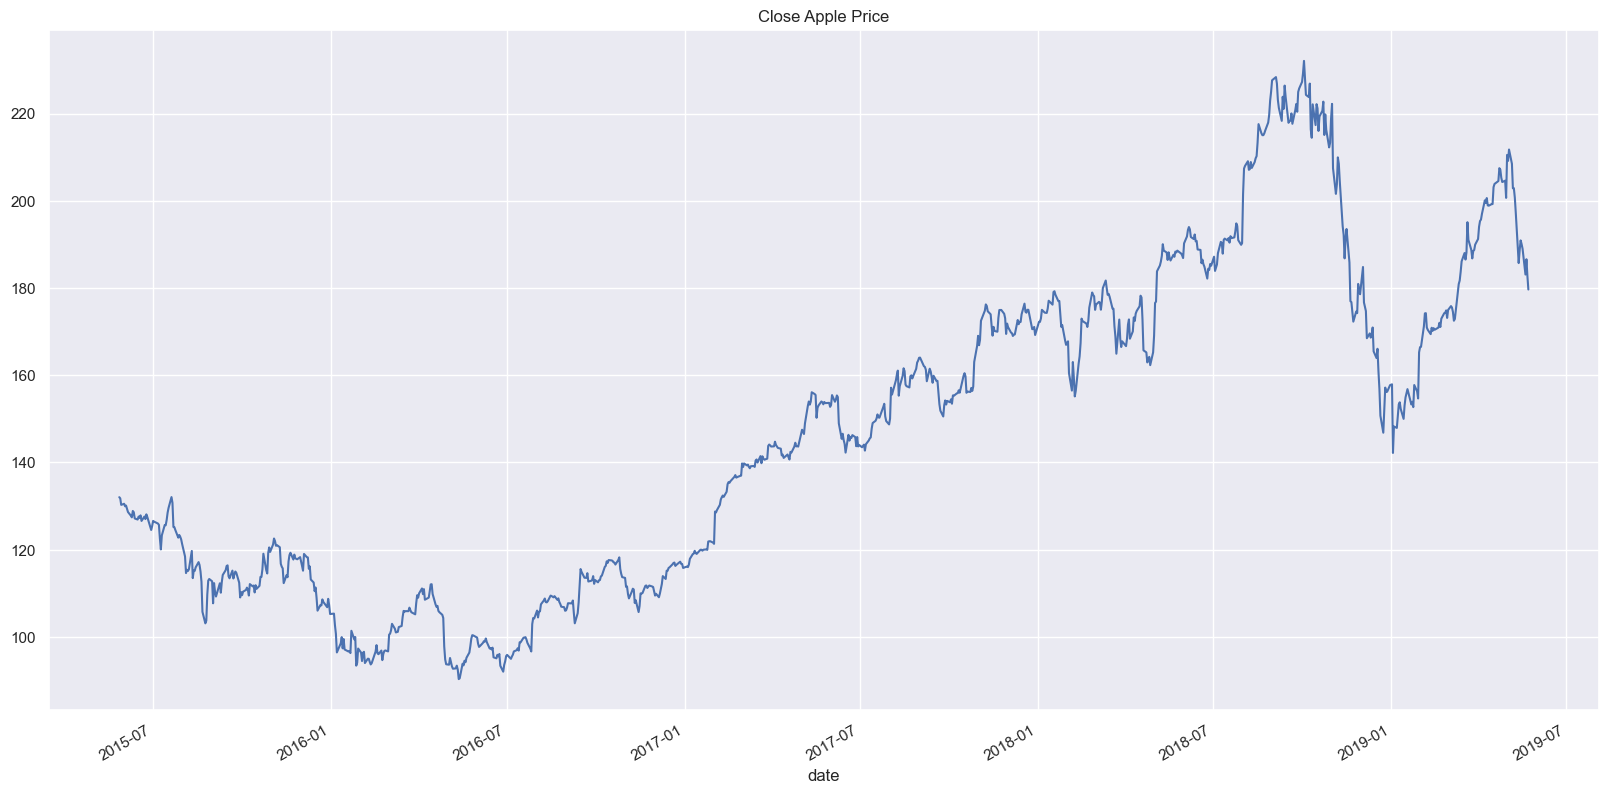

In [79]:
df.close.plot(figsize = (20, 10))
plt.title('Close Apple Price')
plt.show()

In [81]:
sts.adfuller(df.close)

(-0.9914871355905261,
 0.7563564959021063,
 8,
 997,
 {'1%': -3.4369259442540416,
  '5%': -2.8644432969122833,
  '10%': -2.5683158550174094},
 4550.289208699254)

In [83]:
df_copy2 = df.copy

In [85]:
df = df.resample('ME').first()

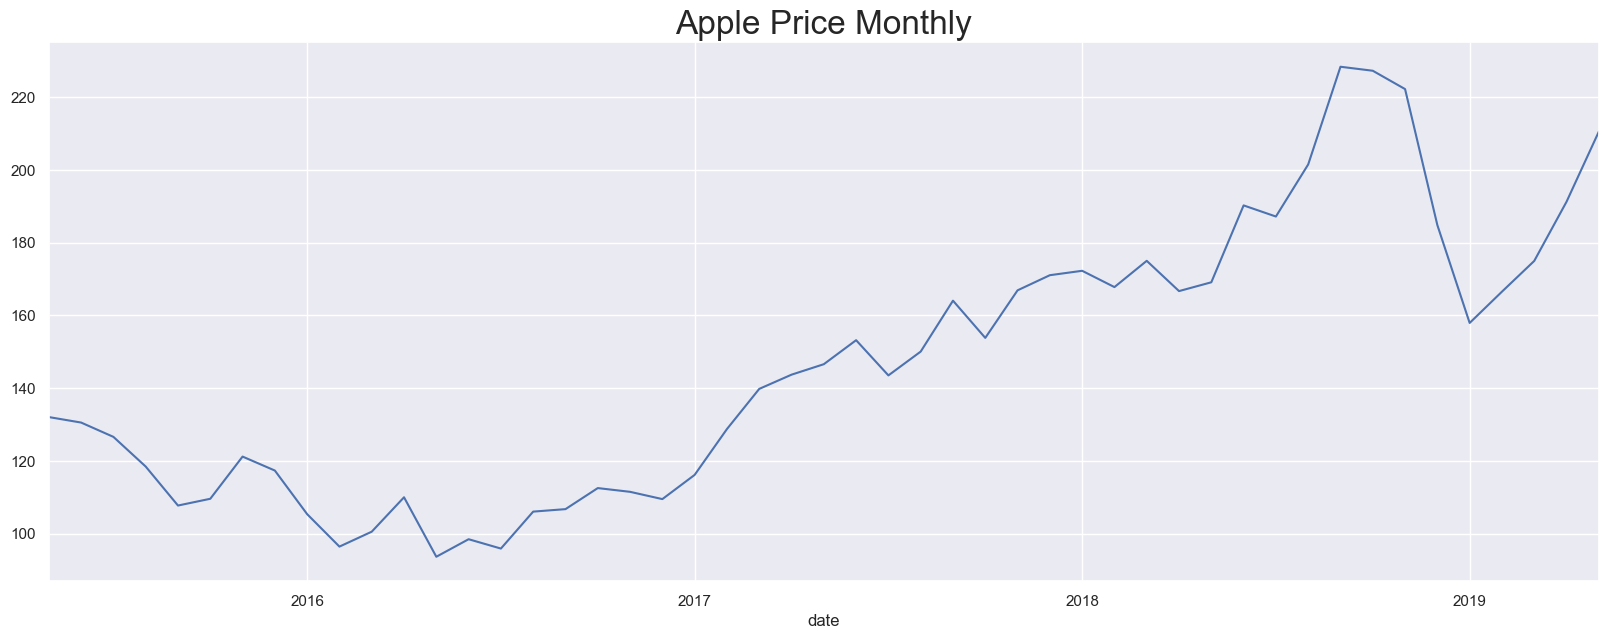

In [87]:
df.close.plot(figsize = (20, 7))
plt.title('Apple Price Monthly', size = 24)
plt.show()

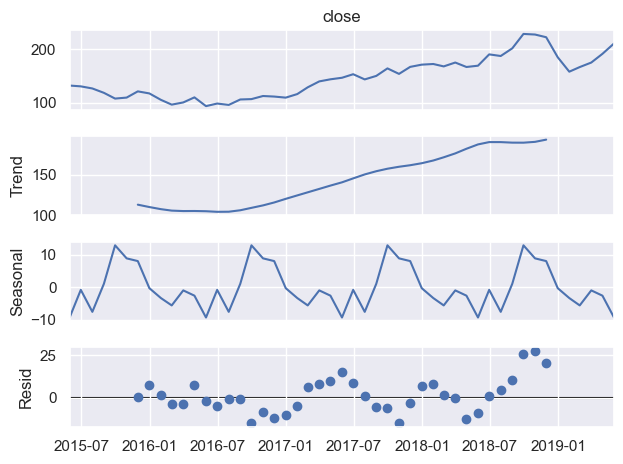

In [89]:
seasonal_additive = seasonal_decompose(df.close, model = 'additive')
seasonal_additive.plot()
plt.show()

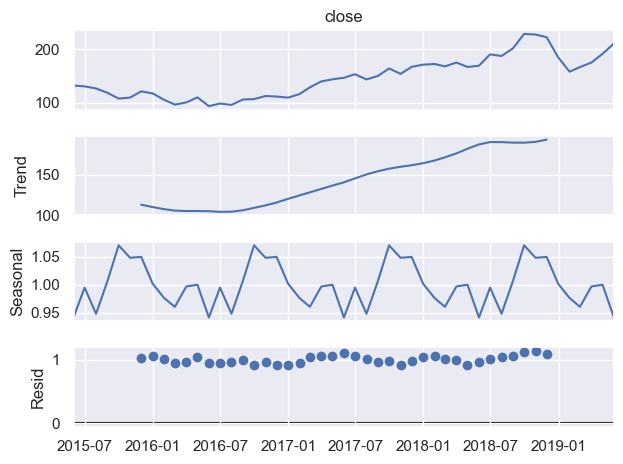

In [91]:
seasonal_multiplicative = seasonal_decompose(df.close, model = 'multiplicative')
seasonal_multiplicative.plot()
plt.show()

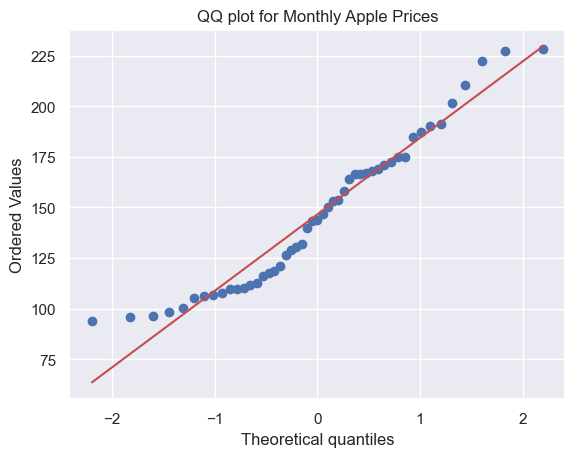

In [93]:
scipy.stats.probplot(df.close, plot = pylab)
plt.title('QQ plot for Monthly Apple Prices')
plt.show()

In [95]:
df.value_counts()

close  
93.640     1
146.580    1
153.180    1
153.810    1
157.920    1
164.050    1
166.520    1
166.680    1
166.890    1
167.780    1
169.100    1
171.050    1
172.260    1
174.970    1
175.000    1
184.820    1
187.180    1
190.240    1
191.240    1
201.500    1
210.520    1
222.220    1
227.260    1
150.050    1
143.700    1
95.890     1
143.500    1
96.430     1
98.460     1
100.530    1
105.350    1
106.050    1
106.730    1
107.720    1
109.490    1
109.580    1
109.990    1
111.490    1
112.520    1
116.150    1
117.340    1
118.440    1
121.180    1
126.600    1
128.750    1
130.535    1
132.045    1
139.790    1
228.360    1
Name: count, dtype: int64

In [97]:
df.describe()

,close
count,49.000000
mean,146.552653
std,37.728573
min,93.640000
25%,111.490000
50%,143.700000
75%,171.050000
max,228.360000


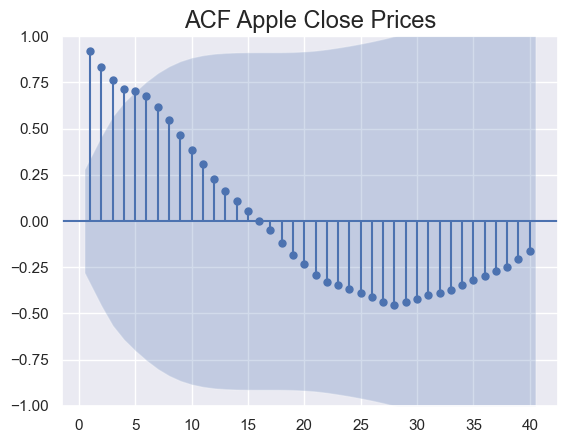

In [99]:
sgt.plot_acf(df.close, lags = 40, zero = False)
plt.title('ACF Apple Close Prices', size = 17)
plt.show()

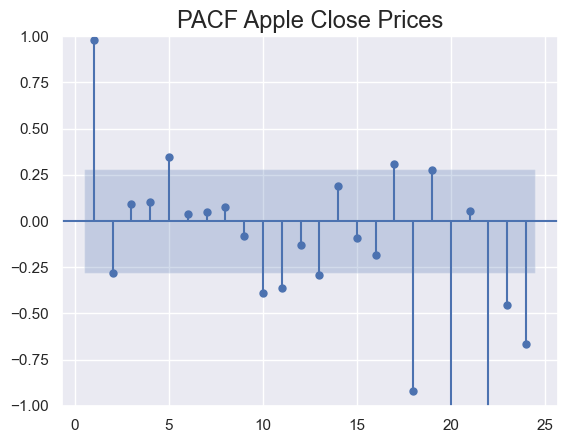

In [101]:
sgt.plot_pacf(df.close, lags = 24, zero = False, method = ('ols'))
plt.title('PACF Apple Close Prices', size = 17)
plt.show()

In [103]:
sts.adfuller(df.close)

(-0.36194440487423707,
 0.9162614323865746,
 4,
 44,
 {'1%': -3.5885733964124715,
  '5%': -2.929885661157025,
  '10%': -2.6031845661157025},
 293.4579572369678)

## Returns

In [105]:
df['returns'] = df.close.pct_change(1).mul(100)
df = df.iloc[1:]

In [107]:
sts.adfuller(df.returns)

(-5.7300679877436576,
 6.631829992680245e-07,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 255.81918099104556)

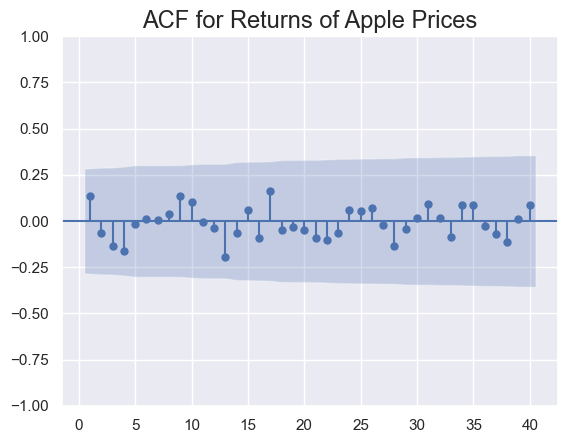

In [109]:
sgt.plot_acf(df.returns, lags = 40, zero = False)
plt.title('ACF for Returns of Apple Prices', size = 17)
plt.show()

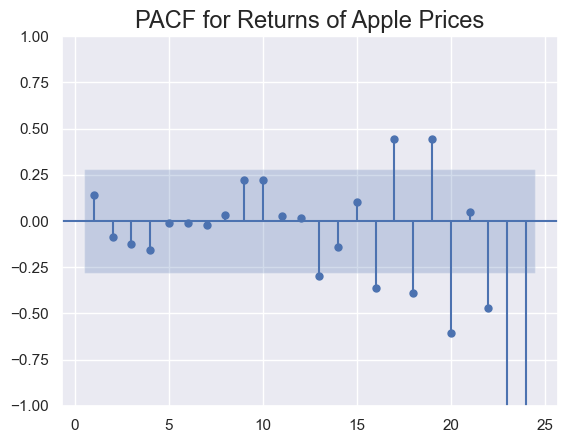

In [111]:
sgt.plot_pacf(df.returns, lags = 24, zero = False, method = ('ols'))
plt.title('PACF for Returns of Apple Prices', size = 17)
plt.show()

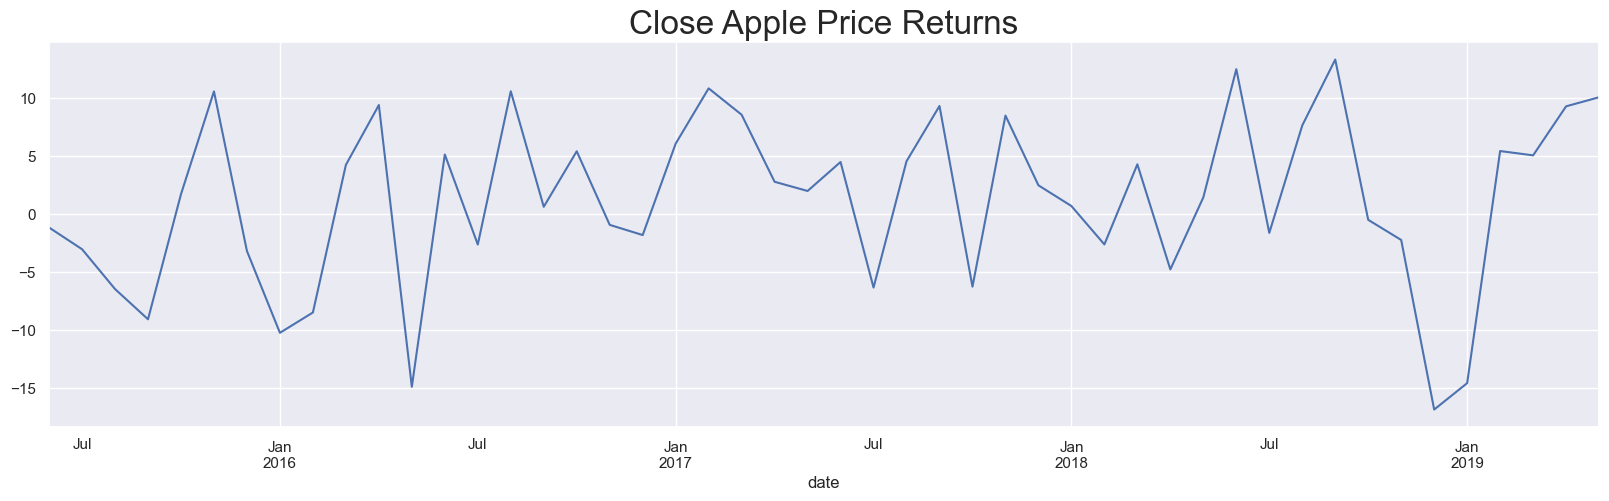

In [113]:
df.returns.plot(figsize = (20, 5))
plt.title('Close Apple Price Returns', size = 24)
plt.show()

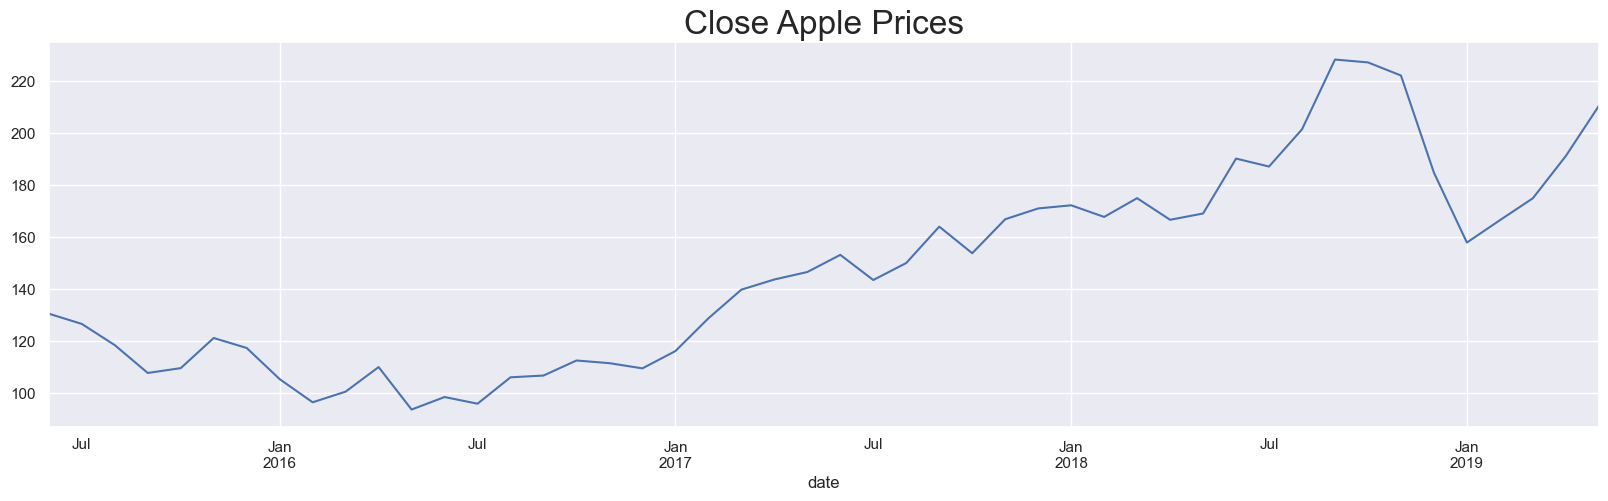

In [115]:
df.close.plot(figsize = (20, 5))
plt.title('Close Apple Prices', size = 24)
plt.show()

In [117]:
model_ret_ma20 = SARIMAX(df.returns, order = (20, 0, 1))
print(model_ret_ma20.fit().summary())

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                   48
Model:              SARIMAX(20, 0, 1)   Log Likelihood                -152.973
Date:                Thu, 20 Feb 2025   AIC                            349.945
Time:                        20:01:01   BIC                            391.111
Sample:                    06-30-2015   HQIC                           365.502
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8349      1.398      0.597      0.550      -1.905       3.575
ar.L2         -0.5735      0.664     -0.863      0.388      -1.875       0.728
ar.L3          0.2173      0.512      0.425      0.6

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


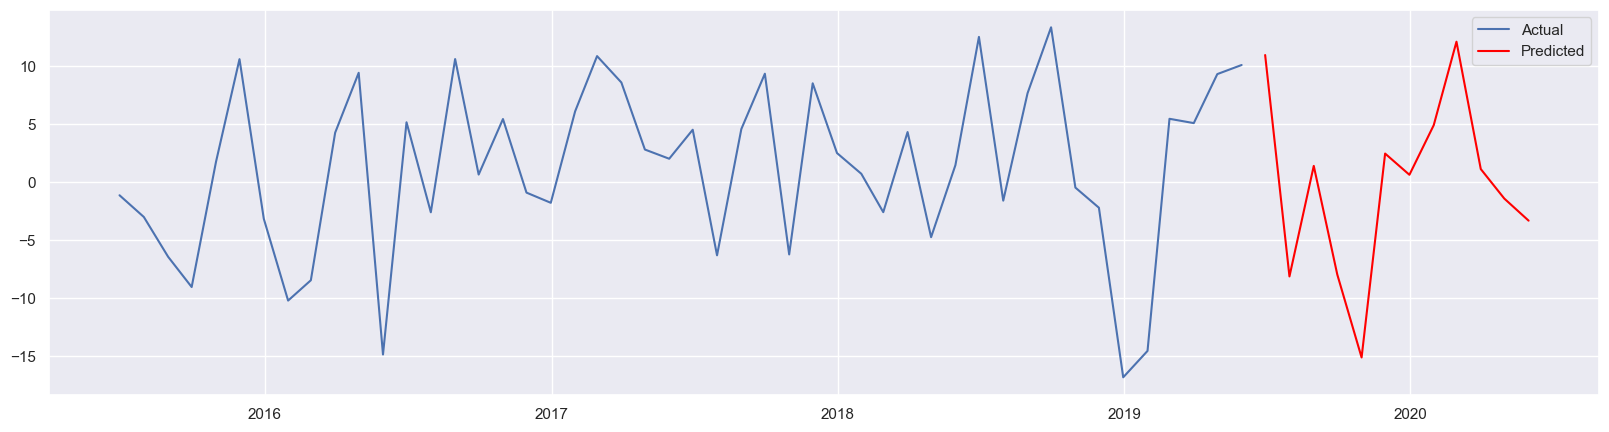

In [119]:
pred = model_ret_ma20.fit().forecast(steps=12)
plt.figure(figsize = (20, 5))
plt.plot(df['returns'], label='Actual')
plt.plot(pred, label='Predicted', color='red')
plt.legend()
plt.show()

### Resid

# ARIMA

For ARIMA make sure to ingnore the appropriate number of rows from the start of the dataset\
[1:] -1 row because we are using returns\
[1:] -1 for d = 1 becasue for each degree of integration -1\
[2:] -2 for d = 2\
[3:] -3 for d = 3\
and so on...

`ARIMA(p, d, q)`\
Additional factor:\
There are often additional factors that affect the price of a market index at a given time period. These can be interest rates, gas prices, holidays, humidity, economic conditions and many more.\
`ARIMA` - models only use past values and past errors for non-stationary data.\
`ARIMAX` - includes external (exogenous) variables to improve predictions - in other words: outside factors with ARIMA model.

If data is already stationary then `ARIMA(1, 0, 1)`, here d = 0 not 1 as it is already stationary.\
A model that takes into account more than just past prices or past residuals (errors) -> `MAX` models\
`ARMAX` -> non-integrated\
`ARIMAX` -> integrated

X - can be any variable we are interested in:
- A time-varying measurement
- A categorical variable
- A boolean value
- A combination of several different external factors.
- Any other variable\
The idea is that it can be any other variable or variables that can affect prices, as long as we have the data available for every period. Such outside factors are known as `exogenous` variables.

We also need to specify the `exogenous` variable with the argument called `"exog"` \
=> exog = array_type\
=> values associated with every time period. Ex: some column as external variable. You have column prices and column tax_rate, so tax_rate can be taken as outside factor as it has an affect on prices.

`d -> integration` - The number of times we need to integrate time-series to ensure stationarity. Accounting for the non-seasonal difference between periods to establish stationarity. Hence even the AR components in the model should be price differences rather than prices. In a sense, we are integrating `d` many times to construct a new time series and then fitting that series into an ARMA(p, q) model.

To be stationary or the stationarity may require our model to have d = N, (N can be 2, 3, 4, ... N) until we reach stationarity.

d = 1 and after model fit we check ADF test, if it is stationary then we need only 1 integration, if not then d = 2 then check for ADF if enough proceed if not then increment integration by + one value.

=> Examine the ACF of the Et (residuals) to get a better feel about which lags to use.

We lose one or several observations when we deal with integrated values just like with returns, this is unavoidable [1:]. This is because there is no previous period where we wish to integrate the very first day of the data set.\
If we integrate (d=1) we lose one observation. If we integrate two times then we lose two observations, and so on.\
For any integration we lose a single observation.\
Having empty values prevents the imported ACF method from compiling correctly.

### Simple ARIMA(1, 1, 1)

In [121]:
model_arima_111 = SARIMAX(df.close, order = (1, 1, 1))
print(model_arima_111.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -181.002
Date:                Thu, 20 Feb 2025   AIC                            368.004
Time:                        20:01:17   BIC                            373.555
Sample:                    06-30-2015   HQIC                           370.093
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2944      0.503     -0.585      0.558      -1.280       0.692
ma.L1          0.5713      0.443      1.289      0.197      -0.297       1.440
sigma2       129.2700     23.190      5.574      0.0

Integration means we are transforming the underlying data while no modelling is performed. Hence any ARIMA(p, d, q) model will have as many coefficients as its non-integrated counterpart - the ARMA(p, q).\
Integrated time-series is a lot closer to `returns` than the `actual prices`. Integration consists of calculating differences.\
The ACF will fail if we forget to remove the first observation(s) due to the missing value at the first element.

### Residuals of ARIMA(1, 1, 1)

In [123]:
df['res_arima_111'] = model_arima_111.fit().resid

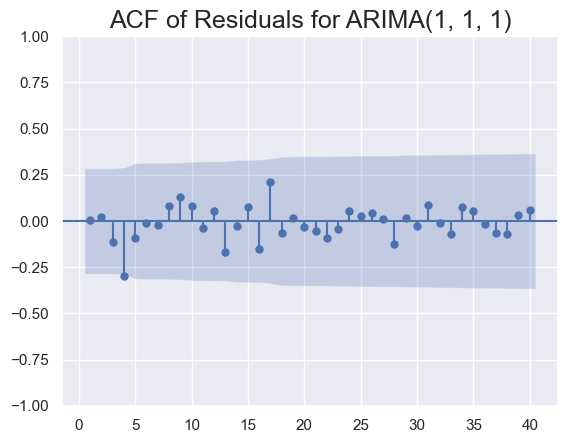

In [125]:
sgt.plot_acf(df.res_arima_111[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(1, 1, 1)', size = 18)
plt.show()

In [143]:
df.res_arima_111.plot(figsize = (20, 5))
plt.title('Residuals for ARIMA(1, 1, 1)', size = 24)
plt.show()

### Higher-Lag ARIMA models

In [169]:
model_arima_112 = SARIMAX(df.close, order=(1, 1, 2))
results_arima_112 = model_arima_112.fit()

model_arima_113 = SARIMAX(df.close, order=(1, 1, 3))
results_arima_113 = model_arima_113.fit()

model_arima_211 = SARIMAX(df.close, order=(2, 1, 1))
results_arima_211 = model_arima_211.fit()

model_arima_311 = SARIMAX(df.close, order=(3, 1, 1))
results_arima_311 = model_arima_311.fit()

model_arima_312 = SARIMAX(df.close, order=(3, 1, 2))
results_arima_312 = model_arima_312.fit(start_ar_lags = 5)

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: start_ar_lags. After release 0.14, this will raise.
  warnings.warn(


Make sure to provide enough starting AR lags for each model.\
`.fit(start_ar_lags = 5)` - in this case 5 or you can put any number

In [173]:
print('ARIMA(1, 1, 2) -- LLF:', results_arima_112.llf, 'AIC:', results_arima_112.aic)
print('ARIMA(1, 1, 3) -- LLF:', results_arima_113.llf, 'AIC:', results_arima_113.aic)
print('ARIMA(2, 1, 1) -- LLF:', results_arima_211.llf, 'AIC:', results_arima_211.aic)
print('ARIMA(3, 1, 1) -- LLF:', results_arima_311.llf, 'AIC:', results_arima_311.aic)
print('ARIMA(3, 1, 2) -- LLF:', results_arima_312.llf, 'AIC:', results_arima_312.aic)

ARIMA(1, 1, 2) -- LLF: -180.6265258486365 AIC: 369.253051697273
ARIMA(1, 1, 3) -- LLF: -180.5718596017484 AIC: 371.1437192034968
ARIMA(2, 1, 1) -- LLF: -180.13002823072316 AIC: 368.2600564614463
ARIMA(3, 1, 1) -- LLF: -179.80539567108175 AIC: 369.6107913421635
ARIMA(3, 1, 2) -- LLF: -178.39857280062947 AIC: 368.79714560125893


In [177]:
def LLR_test(mod_1, mod_2, DF=1): # DF -> degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [181]:
from scipy.stats.distributions import chi2

In [183]:
LLR_test(model_arima_112, model_arima_113)

0.741

In [185]:
LLR_test(model_arima_113, model_arima_211)

C:\Users\khali\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.347

In [195]:
LLR_test(model_arima_311, model_arima_312)

0.093

In [216]:
LLR_test(model_arima_111, model_arima_312)

0.022

In [212]:
LLR_test(model_arima_111, model_arima_312, DF = 3)

0.157

In [214]:
LLR_test(model_arima_312, model_arima_111)

1.0

As ARIMA(3, 1, 2) is showing quite good results, I will go for it

### Residuals check for selected ARIMA model

In [225]:
df['res_arima_312'] = results_arima_312.resid.iloc[:]

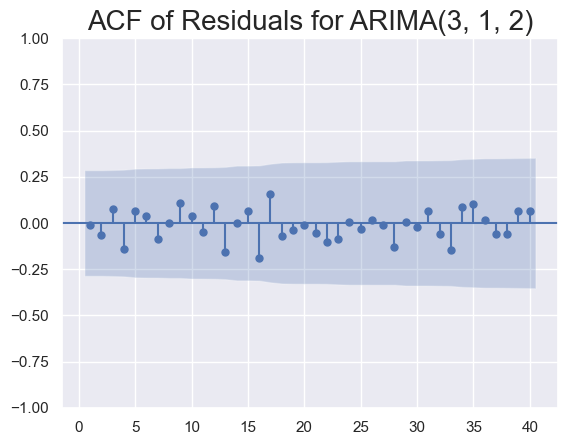

In [233]:
sgt.plot_acf(df.res_arima_312[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(3, 1, 2)', size = 20)
plt.show()

In [243]:
sts.adfuller(df.res_arima_312)

(-14.094308574274624,
 2.687248254442292e-26,
 0,
 47,
 {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 285.95795764337703)

If all residuals are white noise, your model is already good. But if you still want to try bigger lags, pick the smallest significant lags from the original ACF/PACF before differencing. Before applying ARIMA (before differencing), check the ACF/PACF of the original data to identify significant lags. After differencing (d=1), use ACF/PACF again to fine-tune p and q.

Based on my ACF and PACF score I got 5 for AR and 5 for MA and 1 for integration

In [257]:
import warnings
warnings.filterwarnings("ignore")

In [261]:
model_arima_515 = SARIMAX(df.close, order = (5, 1, 5))
results_arima_515 = model_arima_515.fit() # start_ar_lags = 11 removed due to warnings

In [263]:
print(results_arima_515.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   48
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -177.160
Date:                Thu, 20 Feb 2025   AIC                            376.320
Time:                        21:17:28   BIC                            396.671
Sample:                    06-30-2015   HQIC                           383.978
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0223      1.795      0.012      0.990      -3.496       3.540
ar.L2         -0.2124      0.845     -0.251      0.802      -1.869       1.444
ar.L3          0.2482      0.647      0.384      0.7

In [265]:
model_arima_515.fit().llf

-177.15978988515207

In [269]:
model_arima_515.fit().aic

376.31957977030413

In [274]:
print('ARIMA(3, 1, 2) -- LLF:', results_arima_312.llf, 'AIC:', results_arima_312.aic)

ARIMA(3, 1, 2) -- LLF: -178.39857280062947 AIC: 368.79714560125893


ARIMA(5, 1, 5) has higher LLF score which is good, and AIC score is also high which had to be smaller.

In [297]:
LLR_test(model_arima_312, model_arima_515, DF = 5)

0.78

In [303]:
LLR_test(model_arima_515, model_arima_312)

1.0

In [305]:
LLR_test(model_arima_111, model_arima_515, DF = 9)

0.566

In [307]:
LLR_test(model_arima_111, model_arima_515) # DF = 9

0.006

Here you can see that our ARIMA(5, 1, 5) has better results than ARIMA(1, 1, 1). As p value is less than 0.05 we can assume that upgrading our model will give better results.

* It would be better if you could analyze more lags for ARIMA models and try to pick the best. But now time is limited hence as learning experience and building up a structure, this can also be an optimal solution.

### Residual Check for ARIMA(5, 1, 5) model

In [320]:
df['res_arima_515'] = model_arima_515.fit().resid

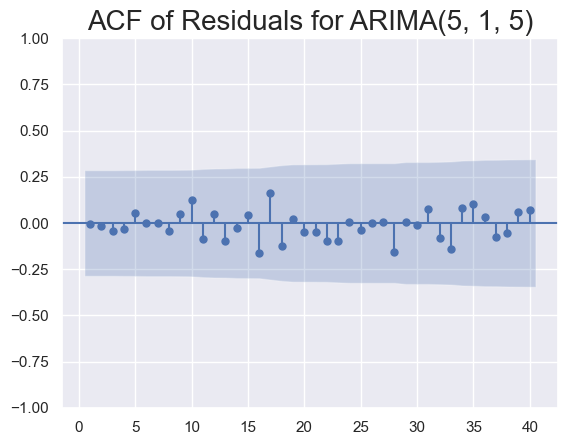

In [322]:
sgt.plot_acf(df.res_arima_515[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for ARIMA(5, 1, 5)', size = 20)
plt.show()

If residuals have no significant lags (inside the blue area), the model is good. If some lags are outside the blue area (e.g., lag 15), you can include them in your ARIMA model to improve it. If all are within the blue area, no need to modify the model. \
For example, if I had lag 15th higher than significance level than I could take it for my ARIMA model and improve, as long as I dont have such lags, model is correct no need for further improvement.

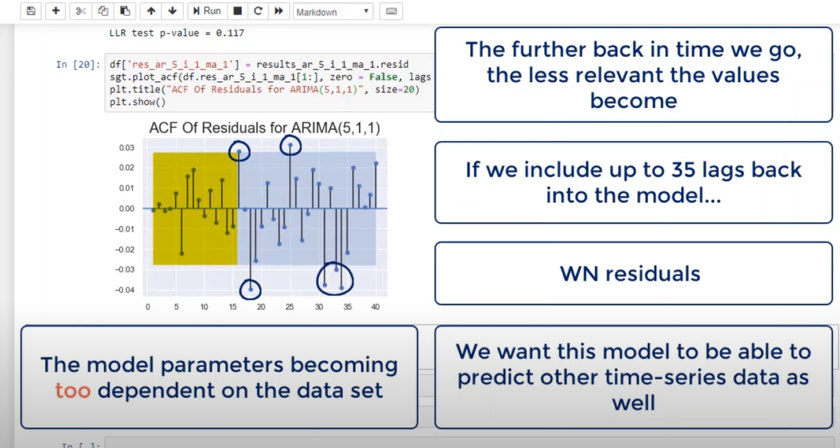

## Models with Higher Levels of Integration

=> We only rely on integration, when our time-series does not come from a stationary process.\
=> If a single layer of integration (d=1) accomplishes this, any additional ones are unnecessary.

How do we know if the integrated data set is stationary?
1) Manually create an integrated version of the original time-series.
2) Use the Augmented Dickey-Fuller test (ADF)

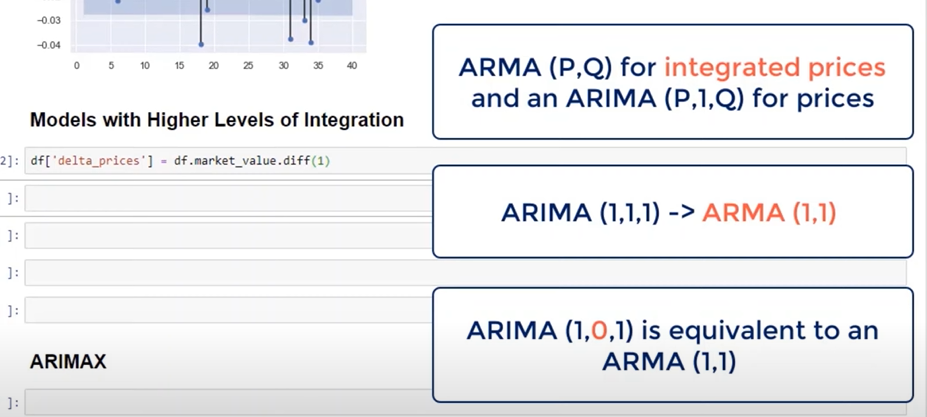

The differences between values 1 period apart. Below one...

In [333]:
df['diff_prices'] = df.close.diff(1)

In [351]:
sts.adfuller(df.diff_prices[1:])
# I got an error when I used first period as it contains Nan

(-4.640748797872895,
 0.00010858187477194243,
 3,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 278.82558255673285)

In [353]:
model_diff_arima_111 = SARIMAX(df.diff_prices[1:], order = (1, 0, 1))
print(model_diff_arima_111.fit().summary())

                               SARIMAX Results                                
Dep. Variable:            diff_prices   No. Observations:                   47
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -181.002
Date:                Thu, 20 Feb 2025   AIC                            368.004
Time:                        22:11:16   BIC                            373.555
Sample:                    07-31-2015   HQIC                           370.093
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2944      0.503     -0.585      0.558      -1.280       0.692
ma.L1          0.5712      0.443      1.289      0.197      -0.297       1.440
sigma2       129.2700     23.190      5.574      0.0

In [355]:
print(model_arima_111.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -181.002
Date:                Thu, 20 Feb 2025   AIC                            368.004
Time:                        22:11:53   BIC                            373.555
Sample:                    06-30-2015   HQIC                           370.093
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2944      0.503     -0.585      0.558      -1.280       0.692
ma.L1          0.5713      0.443      1.289      0.197      -0.297       1.440
sigma2       129.2700     23.190      5.574      0.0

---
Look, here you can notice, they are both identical, have same results in p-values and coeffs. One is difference values and the other one is integrated values. ARIMA(1, 1, 1) which is with d = 1 integration, and ARMA(1, 1) with difference which is done with .diff(1). \
Same above and below, you can check and analyze the results...

---

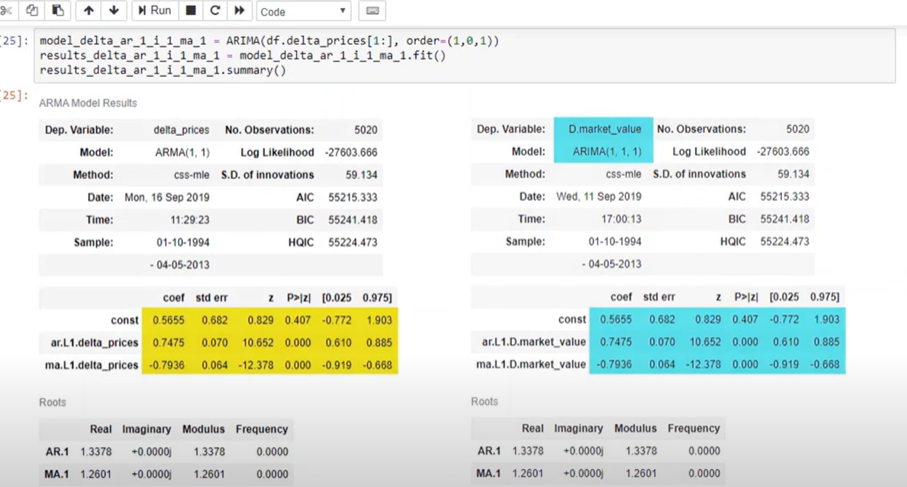

In [362]:
sts.adfuller(df.diff_prices[1:])

(-4.640748797872895,
 0.00010858187477194243,
 3,
 43,
 {'1%': -3.5925042342183704,
  '5%': -2.931549768951162,
  '10%': -2.60406594375338},
 278.82558255673285)

test statistics shows -4.64 which is less than 1%: -3.59 and p value is also less than 0.05. So here is the confirmation that our difference data is stationary.

This also means that we do not need additional layers of integration.\
Fitting ARIMA models with d > 1 is not recommended.

---
The idea was to check if d = 1 was enough for stationarity. By differencing separately and fitting ARIMA(1,0,1), you confirmed that ARIMA(1,1,1) on the original prices gives the same result.

Now, you don't need to use the differenced variable anymore. You can continue working with the original prices using ARIMA(p,1,q) since you already confirmed differencing was enough.

If d = 1 gives the same results as the differenced model, it's enough. If not, you try d = 2 until stationarity is reached and results align.

ARMA on differenced data (d=0) is the same as ARIMA with d=1 on original data since differencing already made it stationary

By using diff(1), you made the data stationary, and with ARIMA d=1, you achieved the same stationary result. So both methods indicate the data is stationary.

---

#### ARIMA(p, d, q) -> for Returns
Make sure to ignore the appropriate number of rows from the start of the dataset:\
1 row because you are using returns\
1 for each degree of integration

# ARIMAX
A model that takes into account more than just past prices or past residuals. (Additional factors)\
`"MAX"` models\
ARMAX -> Non-integrated\
ARIMAX -> Integrated

Here as I do not have any other variables (factors), I had to use df.returns as an example

In [414]:
model_arima_111_exog = SARIMAX(df.close, exog = df.returns, order = (1, 1, 1))
print(model_arima_111_exog.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -160.199
Date:                Thu, 20 Feb 2025   AIC                            328.397
Time:                        23:26:01   BIC                            335.798
Sample:                    06-30-2015   HQIC                           331.182
                         - 05-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        0.6394      0.080      8.035      0.000       0.483       0.795
ar.L1          0.1946      0.245      0.796      0.426      -0.285       0.674
ma.L1          0.6554      0.171      3.840      0.0

As a practice you can try to add more if needed exogenous variables to imrpove log-likelihood.

Not all models are used for predicting future prices or returns. Many investors often seek stability.

# SARIMAX (Seasonality)
Cyclical Trends and the SARIMAX in Time-Series
- SARMA
- SARIMA
- SARIMAX

Seasonality occurs when certain patterns are not consistent but appear periodically.\
The original time-series contains values a month apart while the seasonal one would hold values twelve months apart.

ARIMAX(p, d, q)\
=> `SARIMAX(p, d, q)(P, D, Q, s)`\
`s` - > is the length of cycle. For example, if we have hourly data and the cycle length is 24. Then seasonal pattern appears once every 24 hours. Another way to think about is the number of periods needed to pass before the tendency reappers.\
If `s = 1` then every period is its own cycle so we assume No Seasonality, and the pattern is just autocorrelation.\
If we want to inspect a seasonal trend we need to make sure to set the appropriate cycle length. The last order is represented with a lowercase `s`, because it sets the length of each season.\
The length `s` expresses how far away the seasonal components will be from the current period.

If you resampled your data as monthly ('ME'), the cycle length (s) should be 12, since there are 12 months in a year. If your data was daily, you would typically use 365 for yearly seasonality, but sometimes 7 (weekly seasonality) or 30 (monthly approximation) depending on the pattern in your data. If your data was yearly, seasonality doesn't really apply unless there's a longer cycle. Just set s based on the natural cycle of the data.

Here are some common scenarios for setting seasonality (s) in SARIMAX:

- Monthly Data ('ME' or 'MS') → s = 12 (because there are 12 months in a year)\
Example: Airline passenger data, retail sales, temperature trends.

- Daily Data ('D') → s = 7 (weekly cycle) or s = 365 (yearly cycle)\
Example: Website traffic (weekly seasonality), weather patterns (yearly seasonality).

- Hourly Data ('H') → s = 24 (daily cycle) or s = 168 (weekly cycle)\
Example: Electricity consumption, human activity patterns.

- Weekly Data ('W') → s = 52 (since a year has ~52 weeks)\
Example: Weekly sales, economic indicators.

- Quarterly Data ('Q') → s = 4 (since a year has 4 quarters)\
Example: Company earnings, GDP growth.

Your choice of s depends on the natural cycle in your data.

`s = 5` means the seasonal cycle repeats every 5 time periods (e.g., every 5 days if daily data, every 5 months if monthly data). It depends on your data's frequency.\
Count how often the pattern repeats and set s to that number. You can visually inspect the data to estimate seasonality, but it's better to confirm with ACF plots or seasonal decomposition to be more precise.

Start with ARIMA, then move to SARIMA if seasonality is present, and finally, use SARIMAX if external variables need to be included.\
When seasonality is present but the residuals don’t show it, move to SARIMA.

In [550]:
model_sarimax=SARIMAX(df.close, exog=df.returns, order=(1,1,1), seasonal_order=(2,1,1,4))
print(model_sarimax.fit().summary())

                                     SARIMAX Results                                     
Dep. Variable:                             close   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 4)   Log Likelihood                -147.033
Date:                           Fri, 21 Feb 2025   AIC                            308.065
Time:                                   04:00:04   BIC                            320.393
Sample:                               06-30-2015   HQIC                           312.611
                                    - 05-31-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        0.6267      0.029     21.968      0.000       0.571       0.683
ar.L1          0.1513      0.268      0.564

### Residuals check for SARIMAX

In [552]:
df['res_sarimax'] = model_sarimax.fit().resid

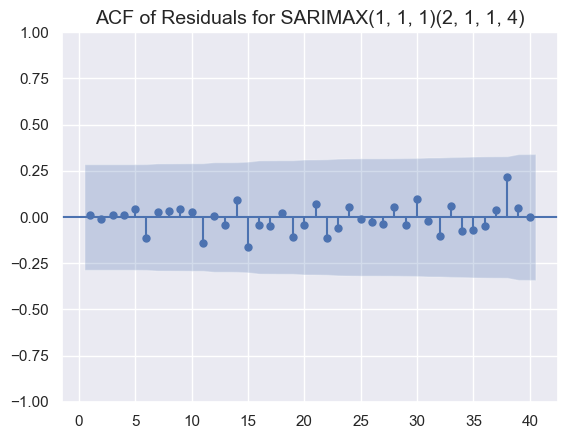

In [554]:
sgt.plot_acf(df.res_sarimax[1:], zero = False, lags = 40)
plt.title('ACF of Residuals for SARIMAX(1, 1, 1)(2, 1, 1, 4)', size = 14)
plt.show()

In [556]:
sts.adfuller(df.res_sarimax[1:])

(-6.563621317890576,
 8.262928809090789e-09,
 0,
 46,
 {'1%': -3.5812576580093696,
  '5%': -2.9267849124681518,
  '10%': -2.6015409829867675},
 247.06715794532067)

#### Additional method for Seasonality check

In [560]:
def fourier_transform(time_series):
    fourier = np.fft.fft(time_series)
    frequency = np.fft.fftfreq(len(time_series))
    plt.plot(frequency, np.abs(fourier))
    plt.title('Fourier Transform - Frequency Spectrum')
    plt.show()

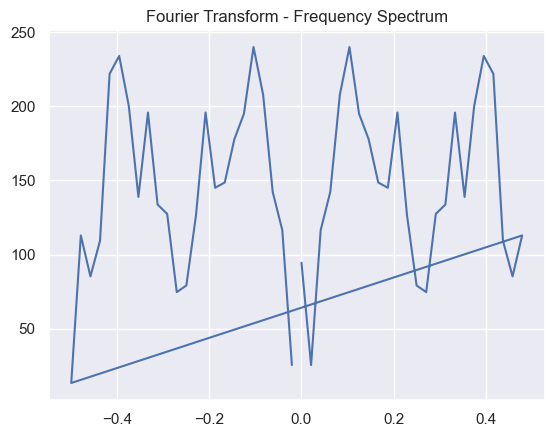

In [562]:
fourier_transform(df.res_sarimax)

# Volatility

Volatility is the magnitude of Residuals. It is about whether patterns (shocks) are positive or negative but rather how off our predictions are. In other words,
`Volatility` is just a measure of how much things vary or change. In the context of predictions, it shows how much your predictions are off from the actual values. If there's high volatility, it means your predictions are often far from the real values, and if there's low volatility, it means your predictions are closer to the actual values.

Volatility is related to residuals because it measures how much the residuals (errors in predictions) fluctuate over time. In forecasting models, large volatility means the errors are more unpredictable, and small volatility means errors are more stable.

`Volatility` is synonymous with `Variance` and there is a reason why we want to avoid it.

# Forecasting

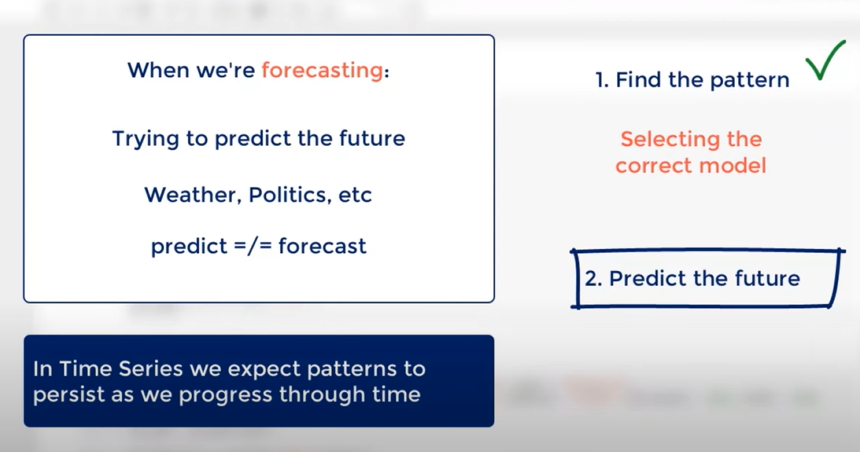

In [589]:
# !pip install pmdarima

In [587]:
# !pip install arch

In [595]:
# !pip install yfinance

In [597]:
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import sklearn
from pmdarima.arima import auto_arima
from arch import arch_model
import yfinance

In [601]:
raw_data = yfinance.download(tickers = '^GSPC ^FTSE ^N225 ^GDAXI', start = '1994-01-07', 
                            end = '2019-09-01', interval = '1d', group_by = 'ticker', 
                            auto_adjust = True)

[*********************100%***********************]  4 of 4 completed


In [607]:
df_comp = raw_data.copy()

In [609]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [629]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [638]:
dff = df_comp

In [648]:
dff['ret_spx'] = dff.spx.pct_change(1).mul(100)
dff['ret_ftse'] = dff.ftse.pct_change(1).mul(100)
dff['ret_dax'] = dff.dax.pct_change(1).mul(100)
dff['ret_nikkei'] = dff.nikkei.pct_change(1).mul(100)

In [654]:
dff['norm_ret_spx'] = dff.ret_spx.div(dff.ret_spx[1])*100
dff['norm_ret_ftse'] = dff.ret_ftse.div(dff.ret_ftse[1])*100
dff['norm_ret_dax'] = dff.ret_dax.div(dff.ret_dax[1])*100
dff['norm_ret_nikkei'] = dff.ret_nikkei.div(dff.ret_nikkei[1])*100

In [659]:
size = int(len(dff)*0.8)
dff, df_test = dff.iloc[:size], dff.iloc[size:]

In [663]:
model_ar = SARIMAX(dff.ftse, order = (1, 0, 0))
results_ar = model_ar.fit()

#### Simple Forecasting

In [668]:
dff.tail()

Ticker,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei,norm_ret_spx,norm_ret_ftse,norm_ret_dax,norm_ret_nikkei
Price,,,,,,,,,,,,
Date,,,,,,,,,,,,
2014-07-09,1972.829956,9808.200195,6718.000000,15302.650391,0.464427,-0.304222,0.363568,-0.076789,5503.791157,24.845739,-17.594800,-4.599222
2014-07-10,1964.680054,9659.129883,6672.399902,15216.469727,-0.413107,-0.678775,-1.519854,-0.563175,-4895.617003,55.435385,73.553079,-33.730996
2014-07-11,1967.569946,9666.339844,6690.200195,15164.040039,0.147092,0.266775,0.074644,-0.344559,1743.149144,-21.787449,-3.612384,-20.637132
2014-07-14,1977.099976,9783.009766,6746.100098,15296.820312,0.484355,0.835549,1.206971,0.875626,5739.958320,-68.239090,-58.411164,52.445064
2014-07-15,1973.280029,9719.410156,6710.500000,15395.160156,-0.193210,-0.527714,-0.650103,0.642878,-2289.672189,43.098256,31.461612,38.504752


Whatever the last shown date is, we select the first business day following it.\
In our case it is `15th` of July 2014, so we select `16th` of July.

Create variables that will help us change the periods easily instead of typing them up every time.\
Make sure the `start` and `end` dates are `business days`, otherwise the code will result in an error.

In [683]:
start_date = '2014-07-16'
end_date = '2015-01-01' # it can be any date.

The longer the period is the harder it is to closely see how the data moves between dates, so for practice we use some mid-range value like above end_date.\
Our results don't look realistic, if you change end date this first plot will also change, you can try.

### AR Model
Below, it is non-stationary data so obviously AR model performs bad here...

In [685]:
df_pred = model_ar.fit().predict(start = start_date, end = end_date)

In [692]:
# df_pred[start_date:end_date].plot(figsize = (20,5), color = 'red')
# plt.title('Predictions for AR model', size = 24)
# plt.show()

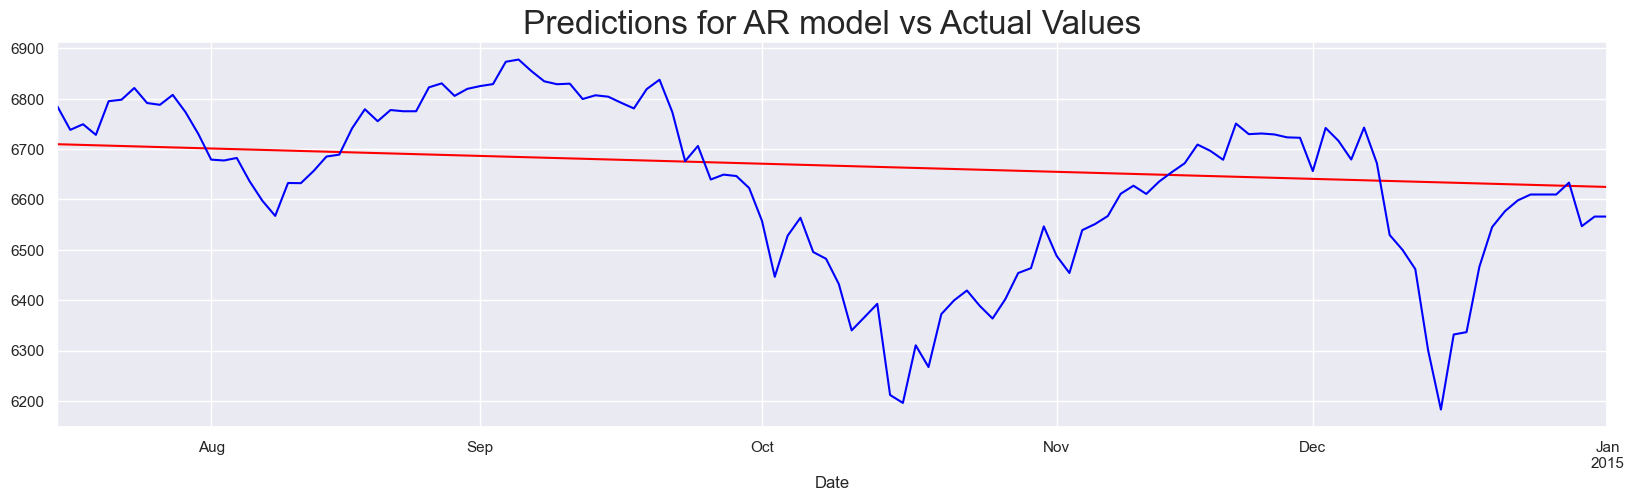

In [696]:
df_pred[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ftse[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for AR model vs Actual Values', size = 24)
plt.show()

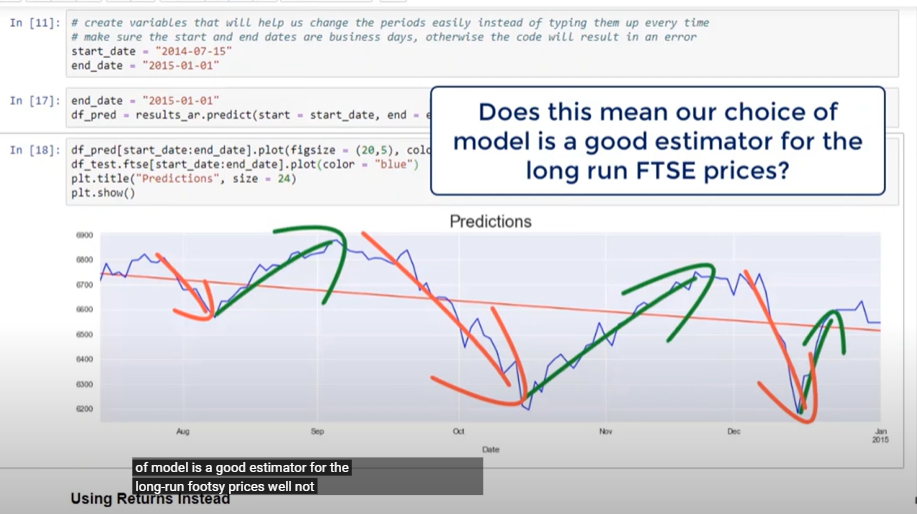

For practice: is the model more accurate in the short or the long term? Also try other variables.

### Using Returns instead

In [742]:
model_ret_ar = SARIMAX(dff.ret_ftse[1:], order = (1, 0, 0))

In [744]:
df_pred_ar = model_ret_ar.fit().predict(start = start_date, end = end_date)

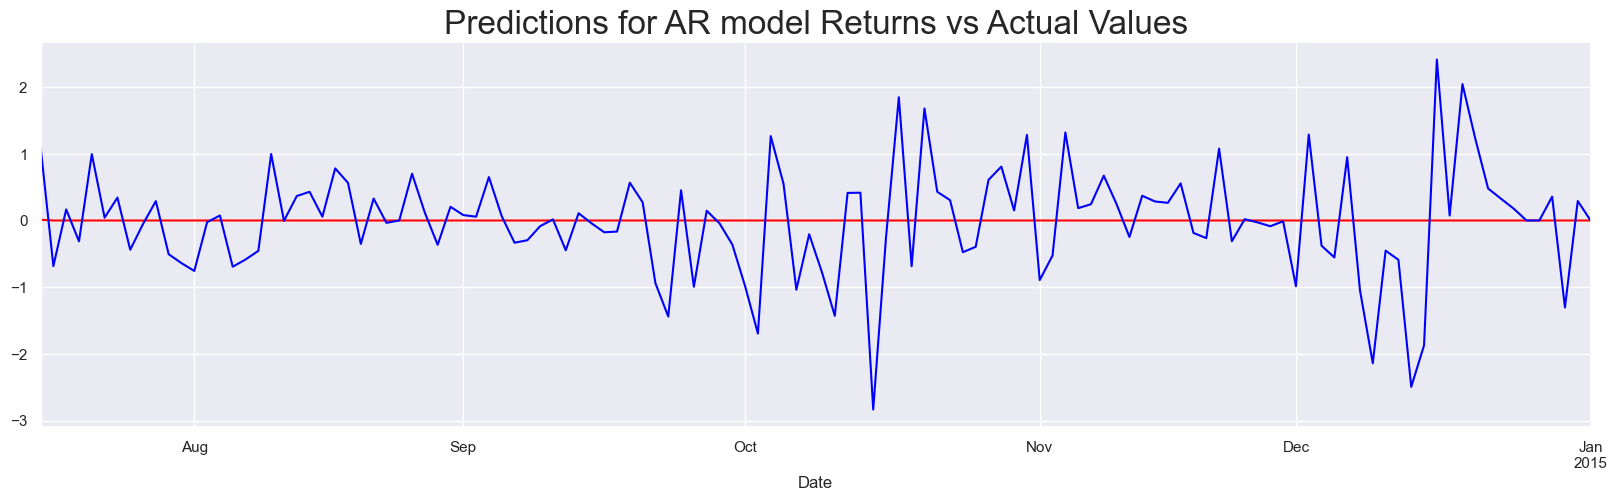

In [746]:
df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for AR model Returns vs Actual Values', size = 24)
plt.show()

Our model makes no predictions since it assumes all future returns will be 0, or extremely close to it.

In [748]:
# print(model_ret_ar.fit().summary())

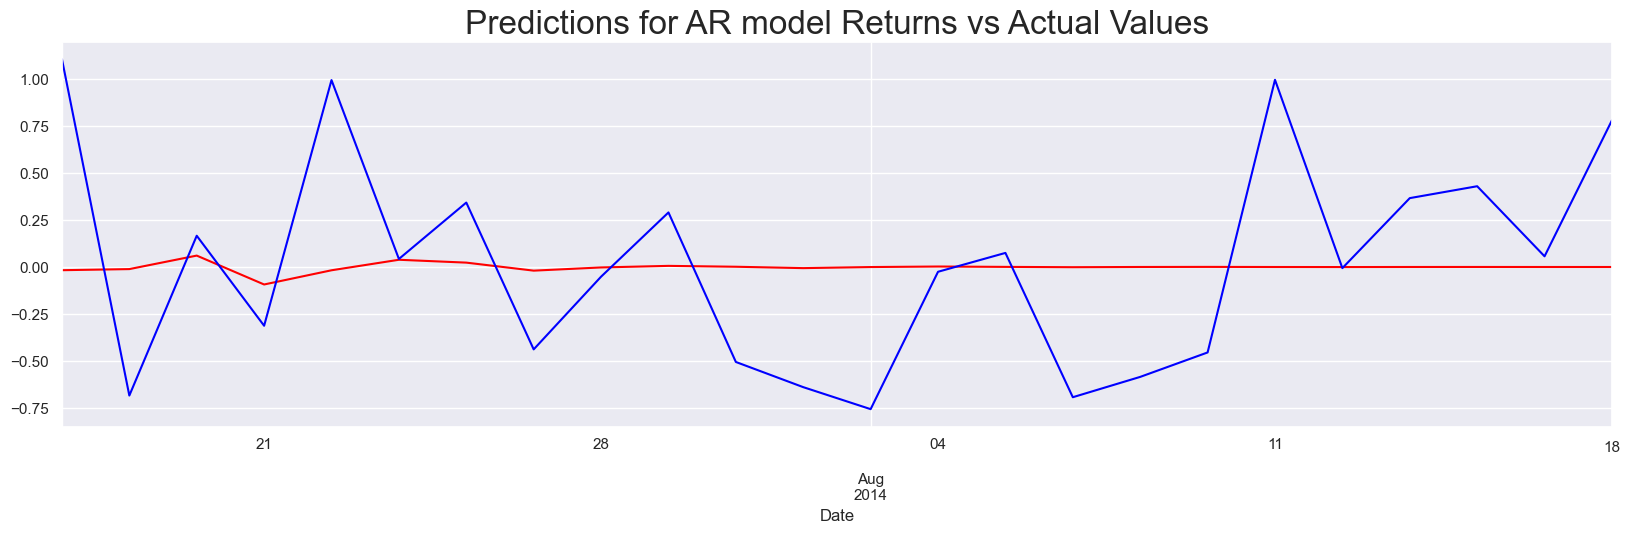

In [750]:
end_date = '2014-08-18'
model_ret_ar = SARIMAX(dff.ret_ftse[1:], order = (8, 0, 0))
df_pred_ar = model_ret_ar.fit().predict(start = start_date, end = end_date)
df_pred_ar[start_date:end_date].plot(figsize = (20,5), color = 'red')
df_test.ret_ftse[start_date:end_date].plot(color = 'blue')
plt.title('Predictions for AR model Returns vs Actual Values', size = 24)
plt.show()

Increasing the order makes little difference in the forecasting capabilites of the model, look at the 21.